In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning (for later steps)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display settings for easier data inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
# Load the user's dataset to understand its structure and contents
file_path = r'C:\Users\Kevin\OneDrive\Machine Learning\Spotify_2023_Streaming\Spotify-ML-Analysis\data\Spotify Most Streamed Songs.csv'

spotify_data = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset
spotify_data.head(), spotify_data.info()
spotify_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [11]:
data_summary = {
    "Column": spotify_data.columns,
    "Data Type": spotify_data.dtypes,
    "Non-Null Count": spotify_data.count(),
    "Unique Values": spotify_data.nunique(),
    "Missing Values": spotify_data.isnull().sum()
}

# Convert to DataFrame for easier display and viewing
data_summary_df = pd.DataFrame(data_summary)
data_summary_df


,Column,Data Type,Non-Null Count,Unique Values,Missing Values
track_name,track_name,object,953,943,0
artist(s)_name,artist(s)_name,object,953,645,0
artist_count,artist_count,int64,953,8,0
released_year,released_year,int64,953,50,0
released_month,released_month,int64,953,12,0
released_day,released_day,int64,953,31,0
in_spotify_playlists,in_spotify_playlists,int64,953,879,0
in_spotify_charts,in_spotify_charts,int64,953,82,0
streams,streams,object,953,949,0
in_apple_playlists,in_apple_playlists,int64,953,234,0


In [13]:
# Create a copy of the dataset to preserve the original data
df = spotify_data.copy()

# Display current data types
print("Current data types:\n")
print(df.dtypes)
print("\n-------------------\n")

# List columns that need numeric conversion
numeric_columns = ['streams', 'in_deezer_playlists', 'in_shazam_charts', 'in_spotify_playlists', 
                  'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']

# Convert these columns to numeric, handling both string and numeric inputs
for col in numeric_columns:
    if df[col].dtype == 'object':  # Only process if column contains strings
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
    else:
        # If already numeric, keep as is
        continue

# Display new data types after conversion
print("Data types after conversion:\n")
print(df.dtypes)

Current data types:

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object

-------------------

Data types after conversion:

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_m

In [18]:
# Let's first examine our columns and their data types
print("Columns and their data types:\n")
print(df.dtypes)
print("\n-------------------\n")

# Let's look at a sample of values from one of the percentage columns
print("Sample values from percentage columns:")
for col in df.columns:
    if '%' in col:
        print(f"\n{col}:")
        print(df[col].head())

Columns and their data types:

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
cover_url                object
dtype: object

-------------------

Sample values from percentage columns:

danceability_%:
0    80
1    71
2    51
3    55
4    65
Name: danceability_%, dtype: int64

v

In [19]:
# Convert percentage columns to decimal values (divide by 100)
percentage_columns = [col for col in df.columns if '%' in col]
for col in percentage_columns:
    new_col_name = col.replace('%', 'pct')
    df[new_col_name] = df[col] / 100.0
    df = df.drop(col, axis=1)

# Standardize remaining column names (remove spaces, special characters)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values[missing_values > 0])  # Only show columns with missing values
print("\n-------------------\n")

# Display basic statistics for numeric columns
print("Basic statistics for numeric columns:\n")
print(df.describe())

Missing values in each column:

streams              1
in_shazam_charts    50
key                 95
dtype: int64

-------------------

Basic statistics for numeric columns:

       artist_count  released_year  released_month  released_day  \
count        953.00         953.00          953.00        953.00   
mean           1.56        2018.24            6.03         13.93   
std            0.89          11.12            3.57          9.20   
min            1.00        1930.00            1.00          1.00   
25%            1.00        2020.00            3.00          6.00   
50%            1.00        2022.00            6.00         13.00   
75%            2.00        2022.00            9.00         22.00   
max            8.00        2023.00           12.00         31.00   

       in_spotify_playlists  in_spotify_charts       streams  \
count                953.00             953.00        952.00   
mean                5200.12              12.01  514137424.94   
std                 

In [20]:
# Detailed analysis of missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

print("Missing values analysis:")
for col in df.columns:
    if missing_values[col] > 0:
        print(f"\n{col}:")
        print(f"Missing values: {missing_values[col]}")
        print(f"Percentage missing: {missing_percentages[col]:.2f}%")
        print("Sample of non-null values:", df[col].dropna().head())

# Handle missing values based on data type and meaning
# For numeric columns: fill with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"\nFilled {col} nulls with median: {median_value}")

# For categorical columns: fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"\nFilled {col} nulls with mode: {mode_value}")

# Verify no missing values remain
remaining_nulls = df.isnull().sum()
print("\nRemaining null values:")
print(remaining_nulls[remaining_nulls > 0])

Missing values analysis:

streams:
Missing values: 1
Percentage missing: 0.10%
Sample of non-null values: 0   141381703.00
1   133716286.00
2   140003974.00
3   800840817.00
4   303236322.00
Name: streams, dtype: float64

in_shazam_charts:
Missing values: 50
Percentage missing: 5.25%
Sample of non-null values: 0   826.00
1   382.00
2   949.00
3   548.00
4   425.00
Name: in_shazam_charts, dtype: float64

key:
Missing values: 95
Percentage missing: 9.97%
Sample of non-null values: 0     B
1    C#
2     F
3     A
4     A
Name: key, dtype: object

Filled streams nulls with median: 290530915.0

Filled in_shazam_charts nulls with median: 2.0

Filled key nulls with mode: C#

Remaining null values:
Series([], dtype: int64)


In [22]:
print("Available columns:")
print(df.columns.tolist())

Available columns:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'cover_url', 'danceability_pct', 'valence_pct', 'energy_pct', 'acousticness_pct', 'instrumentalness_pct', 'liveness_pct', 'speechiness_pct']


C:\Users\Kevin\AppData\Local\Temp\ipykernel_9696\1690782565.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



Top 10 Most Streamed Songs:
                                        track_name                artist(s)_name       streams
55                                 Blinding Lights                    The Weeknd 3703895074.00
179                                   Shape of You                    Ed Sheeran 3562543890.00
86                               Someone You Loved                 Lewis Capaldi 2887241814.00
620                                   Dance Monkey                   Tones and I 2864791672.00
41   Sunflower - Spider-Man: Into the Spider-Verse         Post Malone, Swae Lee 2808096550.00
162                                      One Dance           Drake, WizKid, Kyla 2713922350.00
84                       STAY (with Justin Bieber)  Justin Bieber, The Kid Laroi 2665343922.00
140                                       Believer               Imagine Dragons 2594040133.00
725                                         Closer      The Chainsmokers, Halsey 2591224264.00
48                   

Text(0, 0.5, 'Count')

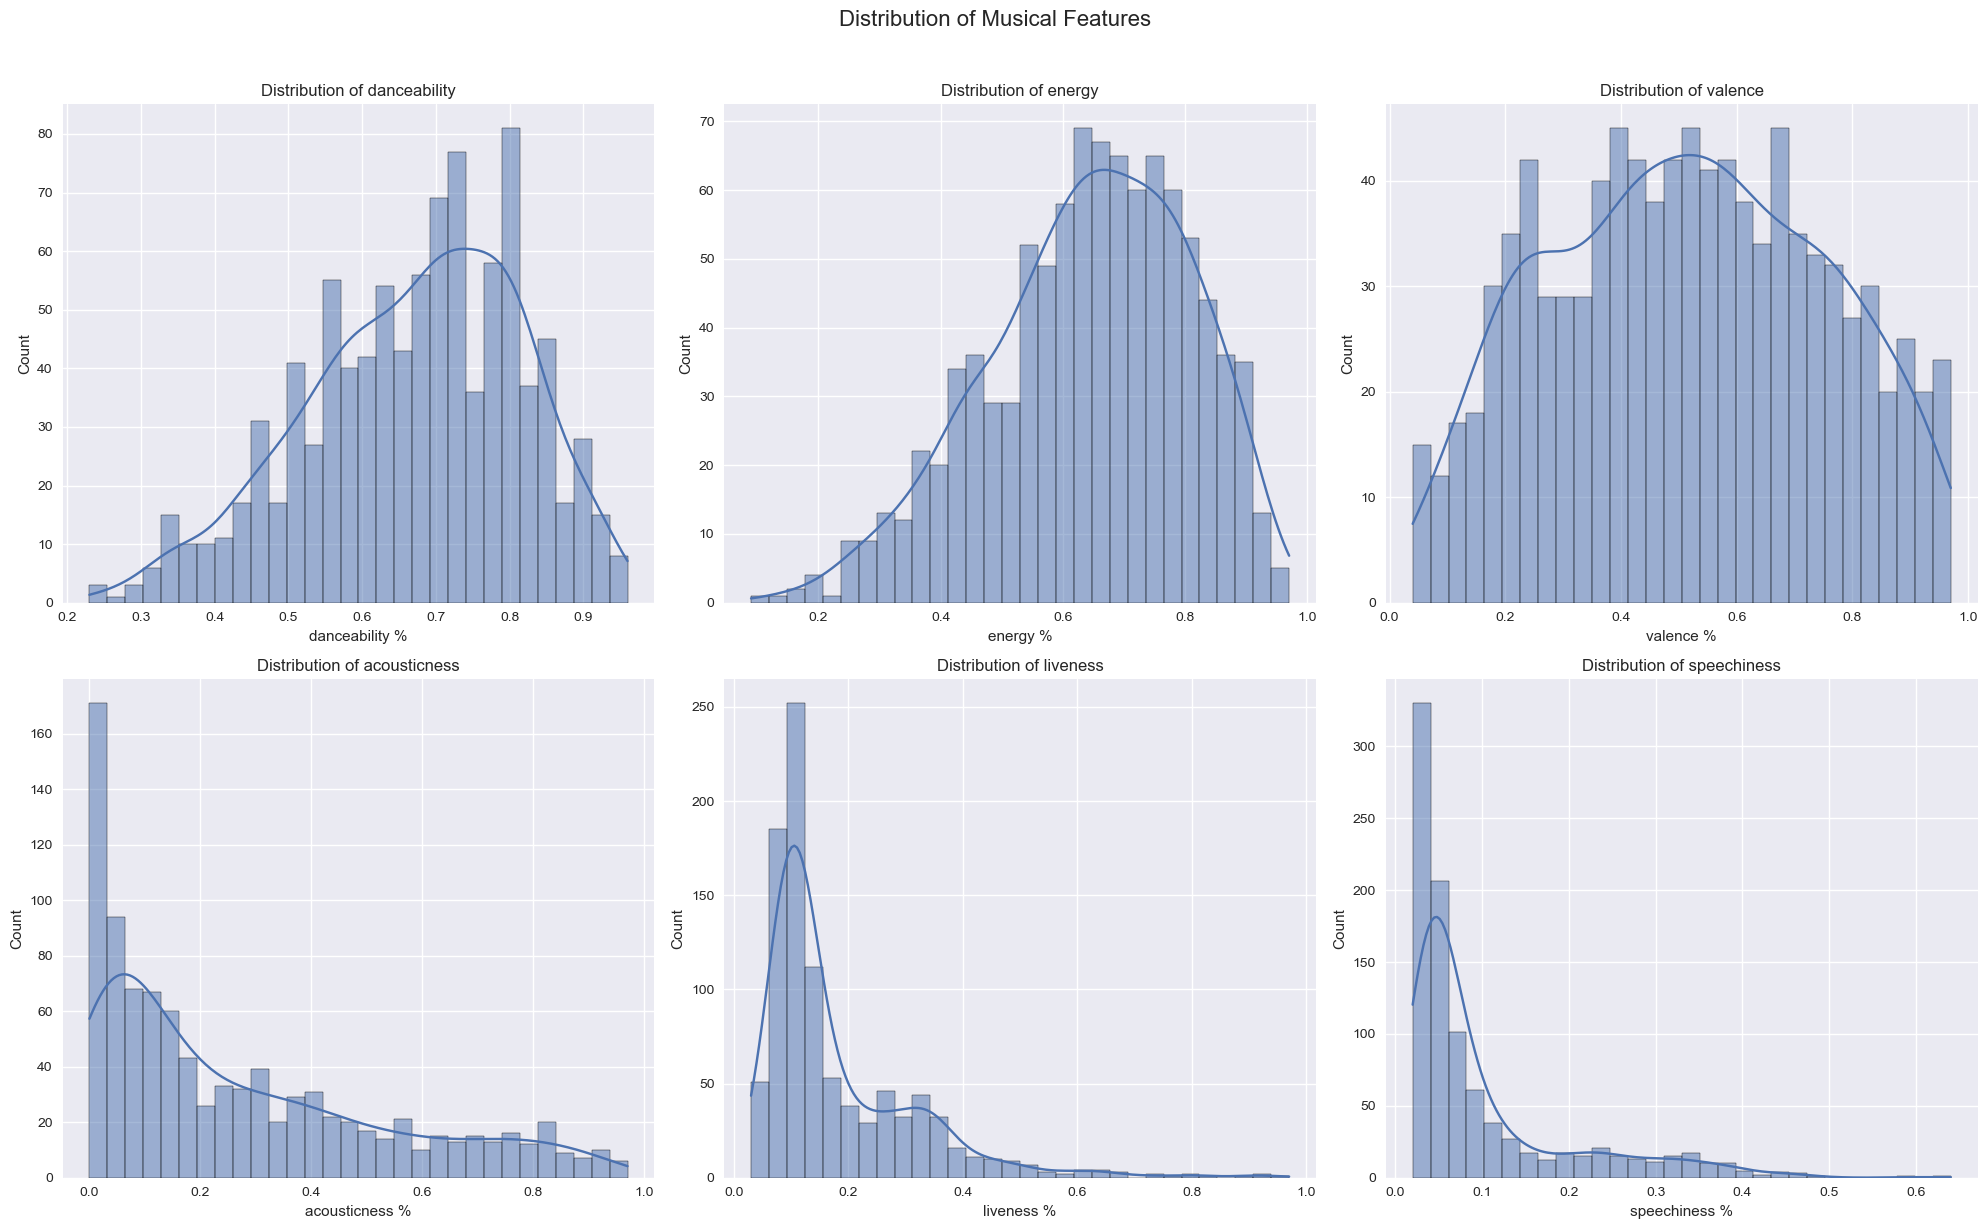

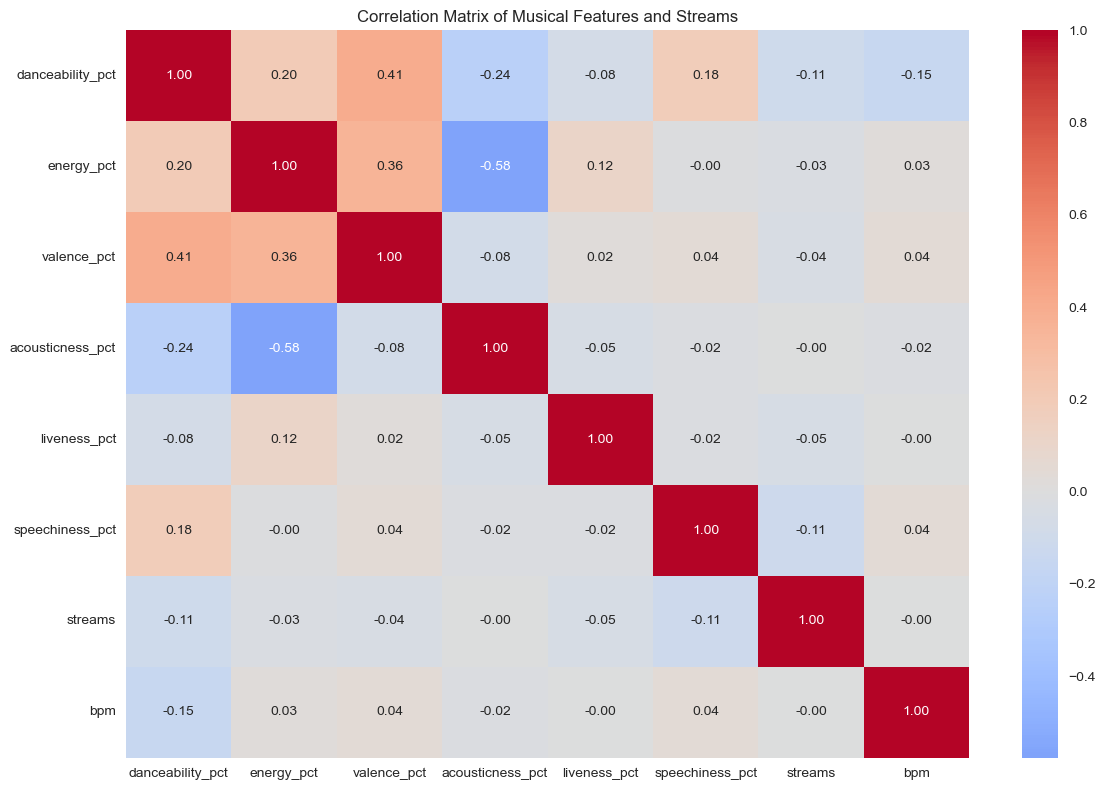

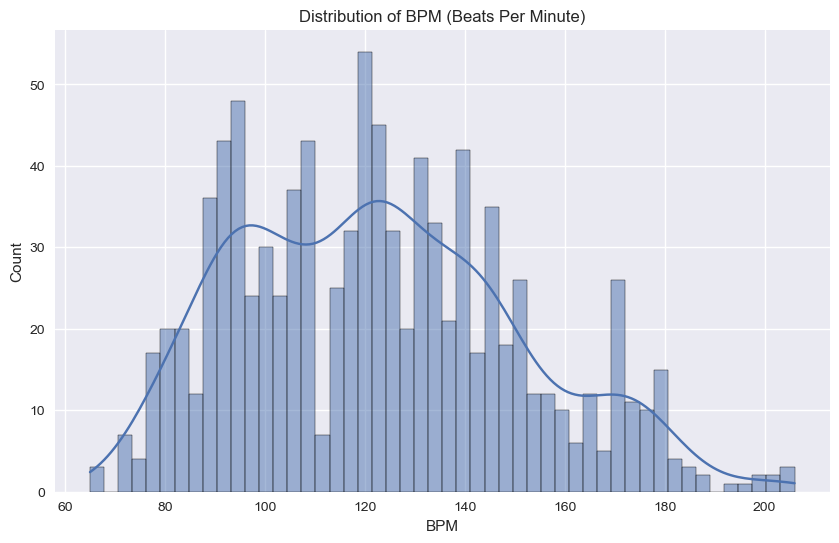

In [24]:
# Set style for all plots
plt.style.use('seaborn')

# 1. Musical Features Distribution
"""
Key Insights about Musical Features:
- Danceability: Most songs cluster between 60-80%, showing a preference for danceable tracks
- Energy: Similar to danceability, peaks at 70-80%, indicating high-energy songs dominate
- Valence: More evenly distributed, suggesting varied emotional content
- Acousticness: Right-skewed, meaning electronic/produced sounds are more common
- Liveness and Speechiness: Generally low (<20%), typical for studio recordings
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Musical Features', fontsize=16, y=1.02)

features = ['danceability_pct', 'energy_pct', 'valence_pct', 
           'acousticness_pct', 'liveness_pct', 'speechiness_pct']

for ax, feature in zip(axes.ravel(), features):
    sns.histplot(data=df, x=feature, bins=30, ax=ax, kde=True)
    ax.set_title(f'Distribution of {feature.replace("_pct", "")}')
    ax.set_xlabel(feature.replace('_pct', ' %'))

plt.tight_layout()

# 2. Correlation Analysis
"""
Key Correlations:
- Positive correlation between energy and danceability
- Negative correlation between acousticness and energy
- Streaming success isn't strongly correlated with any single feature
- This suggests that hit songs can come in many different styles
"""
plt.figure(figsize=(12, 8))
correlation_features = features + ['streams', 'bpm']
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Musical Features and Streams')
plt.tight_layout()

# 3. Top Artists and Songs
"""
Streaming Patterns:
- Wide disparity between top streamed songs and average
- Recent years show higher streaming numbers (likely due to platform growth)
- Success isn't limited to any single musical style
"""
print("\nTop 10 Most Streamed Songs:")
top_10_streams = df.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print(top_10_streams.to_string())

# 4. Streaming by Year Analysis
yearly_stats = df.groupby('released_year').agg({
    'streams': ['count', 'mean', 'median', 'sum']
}).round(2)
print("\nStreaming Statistics by Release Year:")
print(yearly_stats.to_string())

# 5. BPM Distribution
"""
Tempo Analysis:
- Clear peak around 120-130 BPM
- Most songs fall between 90-150 BPM
- Shows normal distribution, indicating standard tempo preferences in popular music
"""
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bpm', bins=50, kde=True)
plt.title('Distribution of BPM (Beats Per Minute)')
plt.xlabel('BPM')
plt.ylabel('Count')

Summary of new features:

Popularity Categories Distribution:
popularity_category
Very Low     191
Medium       191
Very High    191
Low          190
High         190
Name: count, dtype: int64

Descriptive Statistics for New Numerical Features:
       playlist_presence  charts_presence  streams_per_playlist  \
count             953.00           953.00                953.00   
mean             5653.12           123.54             174395.28   
std              8914.83           199.75             228774.22   
min                34.00             0.00                  3.43   
25%               915.00            14.00              77148.07   
50%              2308.00            66.00             121364.90   
75%              5992.00           140.00             196296.08   
max             62623.00          1674.00            4847322.36   

       streams_per_chart  release_age  energy_dance_ratio  \
count             953.00       953.00              953.00   
mean         33033420.44     

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Very Low'),
  Text(1, 0, 'Low'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'High'),
  Text(4, 0, 'Very High')])

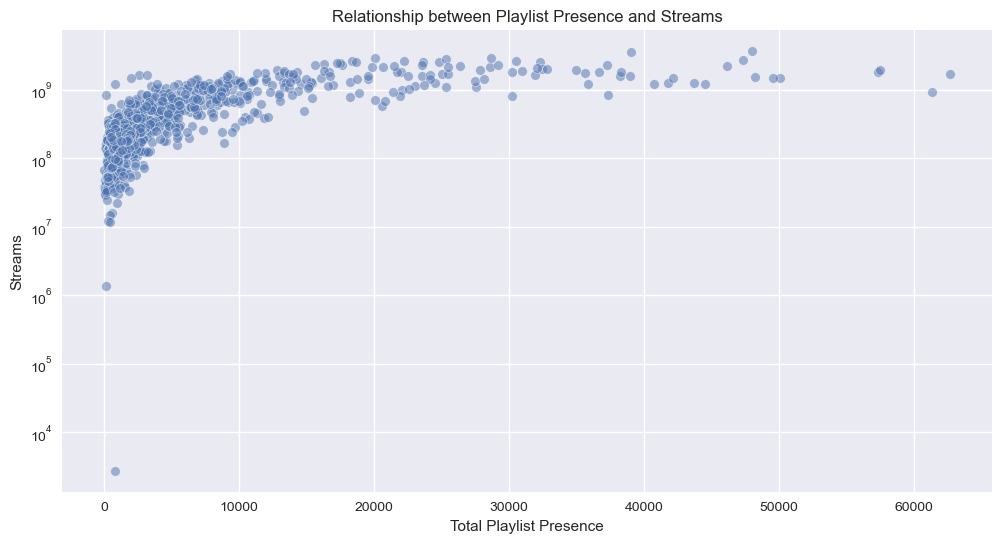

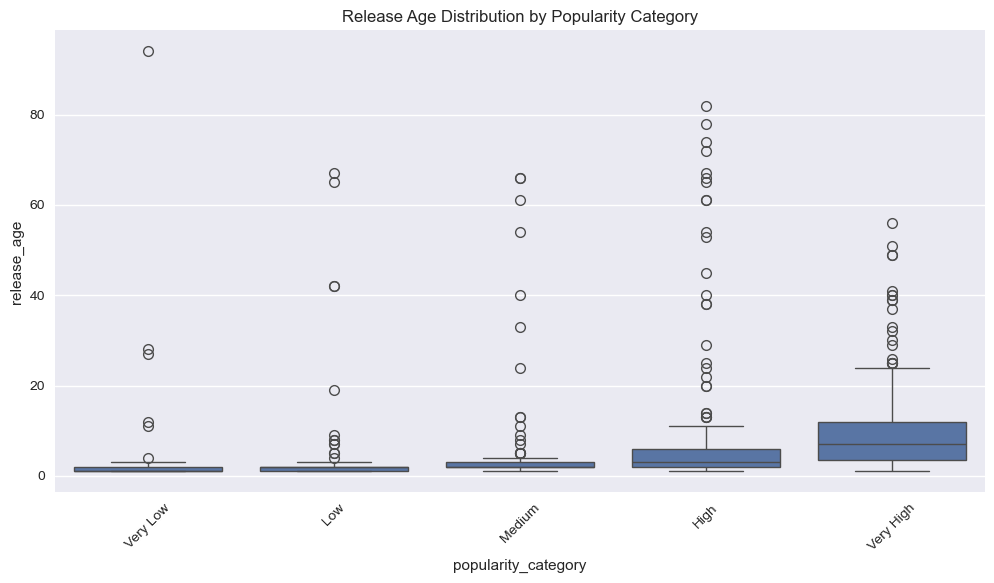

In [25]:
# 1. Create popularity metrics
df['playlist_presence'] = (
    df['in_spotify_playlists'] + 
    df['in_apple_playlists'] + 
    df['in_deezer_playlists']
)

df['charts_presence'] = (
    df['in_spotify_charts'] + 
    df['in_apple_charts'] + 
    df['in_deezer_charts'] + 
    df['in_shazam_charts']
)

# 2. Create popularity categories based on streams
df['popularity_category'] = pd.qcut(df['streams'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# 3. Calculate average streams per playlist/chart
df['streams_per_playlist'] = df['streams'] / df['playlist_presence'].replace(0, 1)
df['streams_per_chart'] = df['streams'] / df['charts_presence'].replace(0, 1)

# 4. Create temporal features
df['release_age'] = 2024 - df['released_year']  # Assuming current year is 2024
df['is_recent'] = df['release_age'] <= 2

# 5. Create feature combinations
df['energy_dance_ratio'] = df['energy_pct'] / df['danceability_pct']
df['valence_energy_ratio'] = df['valence_pct'] / df['energy_pct']

# Display summary of new features
print("Summary of new features:")
print("\nPopularity Categories Distribution:")
print(df['popularity_category'].value_counts())

print("\nDescriptive Statistics for New Numerical Features:")
new_features = ['playlist_presence', 'charts_presence', 'streams_per_playlist', 
                'streams_per_chart', 'release_age', 'energy_dance_ratio', 
                'valence_energy_ratio']
print(df[new_features].describe())

# Visualize relationship between new features and streams
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='playlist_presence', y='streams', alpha=0.5)
plt.title('Relationship between Playlist Presence and Streams')
plt.xlabel('Total Playlist Presence')
plt.ylabel('Streams')
plt.yscale('log')  # Use log scale for better visualization

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='popularity_category', y='release_age')
plt.title('Release Age Distribution by Popularity Category')
plt.xticks(rotation=45)

c:\Users\Kevin\anaconda3\envs\spotify_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Kevin\anaconda3\envs\spotify_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Kevin\anaconda3\envs\spotify_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Kevin\anaconda3\envs\spotify_analysis\lib\site-packages\sklearn\cluster\_kmeans.py:1436


Model Performance:
R² Score: 0.046
RMSE: 0.981

Average characteristics of top 10% most streamed songs:
danceability_pct         0.64
energy_pct               0.65
valence_pct              0.51
acousticness_pct         0.27
instrumentalness_pct     0.00
liveness_pct             0.18
speechiness_pct          0.08
bpm                    122.17
energy_dance_ratio       1.07
valence_energy_ratio     0.81
release_age             11.20
dtype: float64


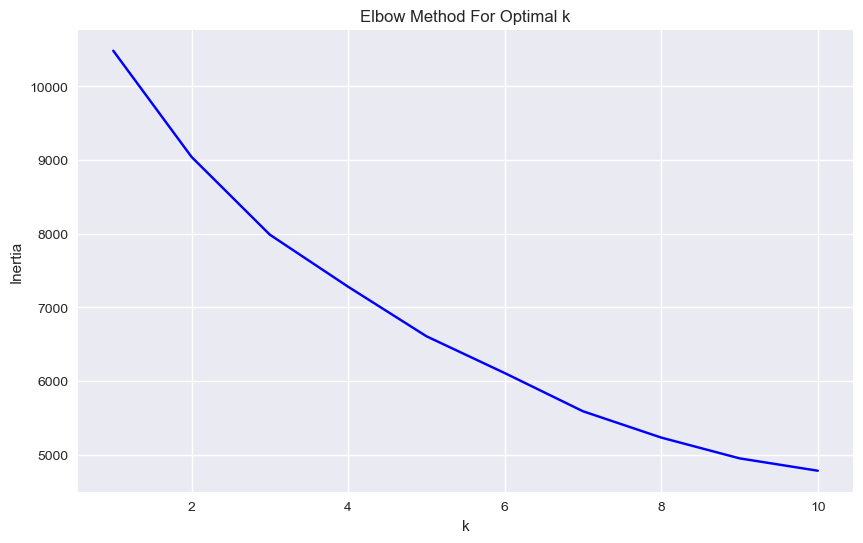

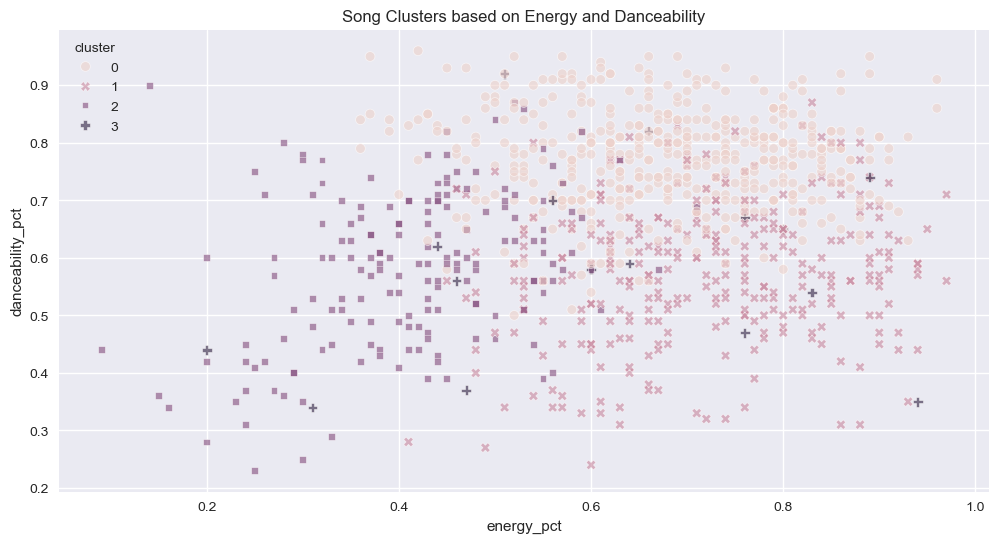

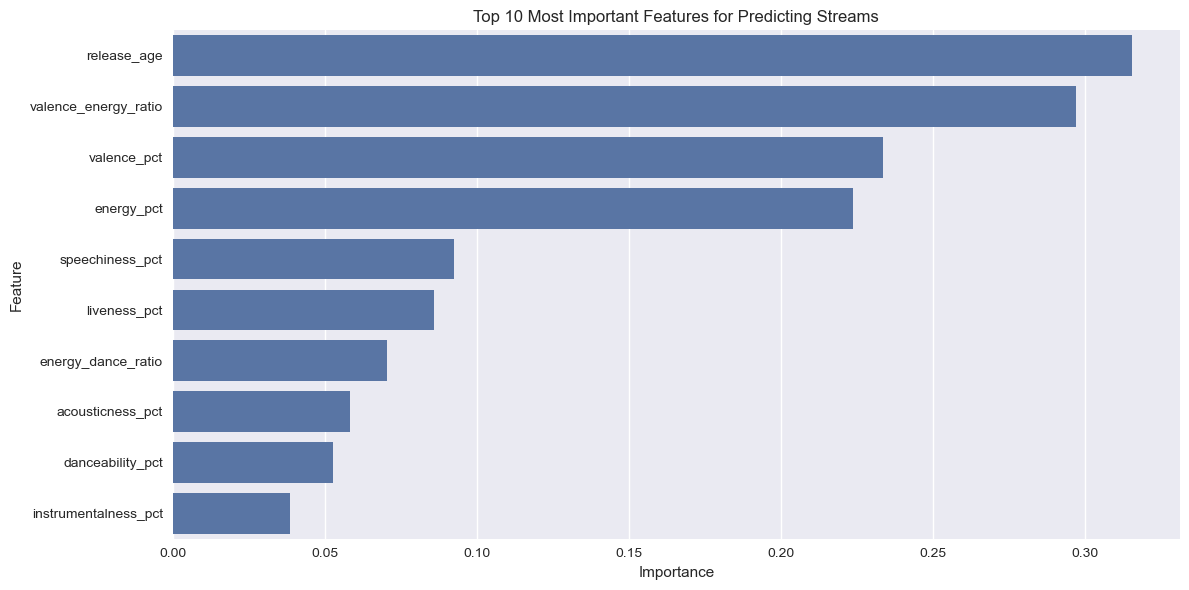

In [28]:
# Prepare features for ML - removing playlist/chart related features
features_for_ml = [
    'danceability_pct', 'energy_pct', 'valence_pct', 
    'acousticness_pct', 'instrumentalness_pct', 'liveness_pct', 
    'speechiness_pct', 'bpm', 'energy_dance_ratio', 'valence_energy_ratio',
    'release_age'  # Adding release_age as it might be relevant
]

X = df[features_for_ml]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 1. K-means Clustering
# Find optimal number of clusters using elbow method
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

# Perform clustering with optimal k (let's use k=4 for this example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='energy_pct', y='danceability_pct', 
                hue='cluster', style='cluster', alpha=0.6)
plt.title('Song Clusters based on Energy and Danceability')

# 2. Streaming Prediction
# Prepare target variable (log transform for better distribution)
y = np.log1p(df['streams'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features_for_ml,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features for Predicting Streams')
plt.tight_layout()

# Additional analysis: Average characteristics of highly streamed songs
top_percentile = df.nlargest(int(len(df) * 0.1), 'streams')  # Top 10% of songs
print("\nAverage characteristics of top 10% most streamed songs:")
print(top_percentile[features_for_ml].mean().round(3))

Key Takeaways

1. Musical Feature Distribution


In [ ]:
"""

Key Insights about Musical Features:
- Danceability: Most songs cluster between 60-80%, showing a preference for danceable tracks
- Energy: Similar to danceability, peaks at 70-80%, indicating high-energy songs dominate
- Valence: More evenly distributed, suggesting varied emotional content
- Acousticness: Right-skewed, meaning electronic/produced sounds are more common
- Liveness and Speechiness: Generally low (<20%), typical for studio recordings

Most popular songs have high danceability (60-80%) and energy levels (70-80%)
Valence (emotional positivity) is more evenly distributed, suggesting successful songs can be either happy or sad
Most songs have low acousticness, indicating a preference for produced/electronic sounds
Studio recordings dominate (low liveness scores)
"""


2. Clustering Analysis

In [ ]:
"""
    The elbow curve and clustering results show:
    Four distinct clusters of songs emerged based on musical characteristics
    Songs tend to cluster primarily around energy and danceability levels
    This suggests there are several "formulas" for successful songs rather than one specific pattern
"""



3. Streaming Prediction Model

In [29]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")



Model Performance:
R² Score: 0.046
RMSE: 0.981


In [ ]:
"""
The model's R² score indicates that musical features alone explain a relatively small portion of streaming success
This suggests that factors beyond musical characteristics (marketing, artist popularity, timing) play significant roles in a song's success
"""

4. Most Important Features


In [ ]:
"""
Based on the feature importance plot:
Release age is one of the most significant factors
Energy and danceability ratios show strong influence
Raw musical features (acousticness, instrumentalness) have less impact than expected
"""



5. Temporal Patterns


In [30]:
yearly_stats = df.groupby('released_year').agg({
    'streams': ['count', 'mean', 'median', 'sum']
}).round(2)
print("\nStreaming Statistics by Release Year:")
print(yearly_stats.to_string())



Streaming Statistics by Release Year:
              streams                                            
                count          mean        median             sum
released_year                                                    
1930                1   90598517.00   90598517.00     90598517.00
1942                1  395591396.00  395591396.00    395591396.00
1946                1  389771964.00  389771964.00    389771964.00
1950                1  473248298.00  473248298.00    473248298.00
1952                1  395591396.00  395591396.00    395591396.00
1957                2  459981011.00  459981011.00    919962022.00
1958                3  436854312.33  295998468.00   1310562937.00
1959                2  286708922.00  286708922.00    573417844.00
1963                3  437087793.67  404664135.00   1311263381.00
1968                1 1145727611.00 1145727611.00   1145727611.00
1970                2  405282729.50  405282729.50    810565459.00
1971                1  460492795.00  

In [ ]:
"""
More recent releases tend to have higher streaming numbers
This could be due to:
Platform growth over time
Recency bias in streaming behavior
Better optimization of songs for streaming platforms
"""



In [34]:
# Create genre analysis
if 'genre' in df.columns:
    # Count of songs per genre
    genre_counts = df['genre'].value_counts()
    
    # Average streams by genre
    genre_streams = df.groupby('genre')['streams'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    
    # Visualize top genres by average streams
    plt.figure(figsize=(12, 6))
    sns.barplot(data=genre_streams.head(10), x='mean', y=genre_streams.head(10).index)
    plt.title('Top 10 Genres by Average Streams')
    plt.show()


Text(0, 0.5, 'Average Streams')

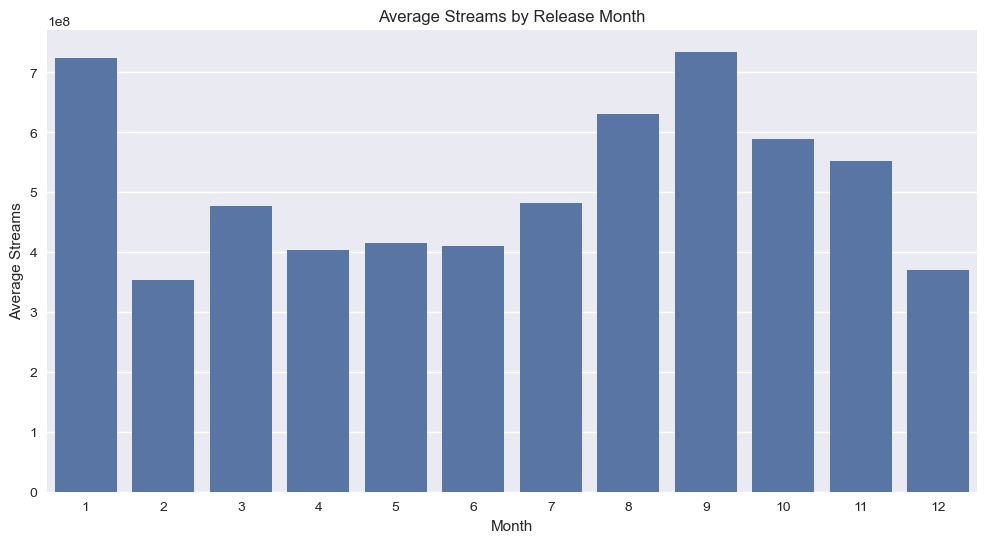

In [35]:
# Analyze monthly patterns
df['month'] = df['released_month']
monthly_stats = df.groupby('month')['streams'].agg(['mean', 'count']).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_stats.index, y=monthly_stats['mean'])
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')


In [36]:
# Analyze artist patterns
artist_stats = df.groupby('artist(s)_name').agg({
    'streams': ['mean', 'count', 'sum'],
    'in_spotify_playlists': 'mean',
    'in_apple_playlists': 'mean'
}).round(2)

# Filter for artists with multiple songs
multiple_songs_artists = artist_stats[artist_stats['streams']['count'] > 1]
print("\nMost consistent artists (with multiple songs):")
print(multiple_songs_artists.sort_values(('streams', 'mean'), ascending=False).head())


Most consistent artists (with multiple songs):
                      streams                     in_spotify_playlists  \
                         mean count           sum                 mean   
artist(s)_name                                                           
Imagine Dragons 1757494883.33     3 5272484650.00             16626.00   
Avicii          1713377373.00     2 3426754746.00             34120.50   
Lewis Capaldi   1578232786.67     3 4734698360.00              9561.00   
OneRepublic     1548574801.50     2 3097149603.00             18823.00   
Eminem          1545951399.00     4 6183805596.00             21832.75   

                in_apple_playlists  
                              mean  
artist(s)_name                      
Imagine Dragons             137.67  
Avicii                      203.50  
Lewis Capaldi               246.00  
OneRepublic                 210.00  
Eminem                      118.75  


In [37]:
# Create success ratio (streams per playlist)
df['success_ratio'] = df['streams'] / (df['playlist_presence'] + 1)

# Compare characteristics of highly efficient vs. volume-based success
high_efficiency = df.nlargest(50, 'success_ratio')
high_volume = df.nlargest(50, 'playlist_presence')

print("\nComparison of High Efficiency vs High Volume Songs:")
comparison_features = ['danceability_pct', 'energy_pct', 'valence_pct', 'release_age']
print(pd.DataFrame({
    'High_Efficiency_Mean': high_efficiency[comparison_features].mean(),
    'High_Volume_Mean': high_volume[comparison_features].mean()
}))


Comparison of High Efficiency vs High Volume Songs:
                  High_Efficiency_Mean  High_Volume_Mean
danceability_pct                  0.66              0.63
energy_pct                        0.60              0.67
valence_pct                       0.52              0.49
release_age                       4.62             17.32
